In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def species2num(species):
    if (species == "Leptodactylidae"):
        return 0
    elif(species == "Hylidae"):
        return 1
    elif(species == "Dendrobatidae"):
        return 2
    elif(species == "Bufonidae"):
        return 3
    else:
        raise ValueError(species)

x = np.loadtxt('anuran_calls/Frogs_MFCCs.csv', skiprows=1, delimiter=',', usecols=tuple(np.arange(0, 22, 1)), unpack=True)
y = np.loadtxt('anuran_calls/Frogs_MFCCs.csv', skiprows=1, delimiter=',', usecols=22, converters={22: species2num}, encoding="latin1")

In [3]:
#centering
x = (x - np.mean(x, axis=1, keepdims=True)) / np.std(x, axis=1, keepdims=True)

In [7]:
C = np.cov(x)

In [8]:
e, v = np.linalg.eigh(C)
e = e[::-1]
v = v[:, ::-1]

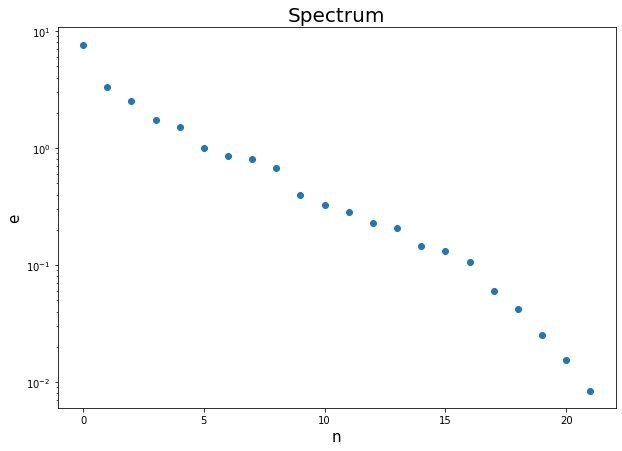

In [9]:
f = plt.figure(figsize=(10, 7))

plt.title("Spectrum", fontsize=20)
plt.ylabel("e", fontsize=15)
plt.xlabel("n", fontsize=15)

plt.yscale('log')
plt.plot(e, 'o')

plt.show()

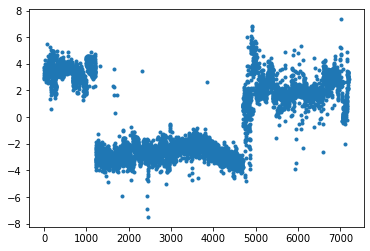

In [13]:
y_1_PCA = np.sum(x*v[:, 0].reshape(-1, 1), axis=0)
plt.plot(y_1_PCA,'.')
y_2_PCA = np.sum(x*v[:, 1].reshape(-1, 1), axis=0)

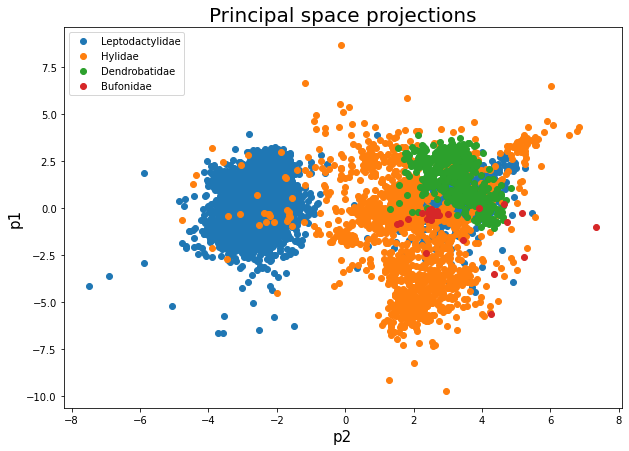

In [11]:
f = plt.figure(figsize=(10, 7))

plt.title("Principal space projections", fontsize=20)

plt.xlabel("p2", fontsize=15)
plt.ylabel("p1", fontsize=15)

plt.plot(y_1_PCA[np.where(y==0)], y_2_PCA[np.where(y==0)], 'o', label='Leptodactylidae')
plt.plot(y_1_PCA[np.where(y==1)], y_2_PCA[np.where(y==1)], 'o', label='Hylidae')
plt.plot(y_1_PCA[np.where(y==2)], y_2_PCA[np.where(y==2)], 'o', label='Dendrobatidae')
plt.plot(y_1_PCA[np.where(y==3)], y_2_PCA[np.where(y==3)], 'o', label='Bufonidae')

plt.legend()

plt.show()